In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import keras.utils as utils
import numpy as np

Using TensorFlow backend.


In [2]:
# 10 possible categories in the CIFAR-10 dataset
labels= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [3]:
# Loading the data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Converting images to float values
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Converting to categorical
train_labels = utils.to_categorical(train_labels)
test_labels = utils.to_categorical(test_labels)

In [4]:
# Creating sequential keras model so that layers can be added in order
model = Sequential()

In [5]:
# Defining layers based on the features of the dataset

# Add the first convolution to output a feature map
# filters: output 32 features
# kernel_size: 3x3 filter matrix used to calculate output features
# input_shape: input data consists of 32x32 color images
# activation: relu activation utilized for best results
# kernel_constraint: normalizes max value to be 3
# padding: 'same' ensures output features map is same size as input
conv_layer = Conv2D(filters = 32, kernel_size = (3, 3), input_shape = (32, 32, 3), activation = 'relu', 
                    kernel_constraint = maxnorm(3), padding = 'same')

# Add max pool layer to decrease image size to 16x16
# pool_size: finds max value in each 2x2 section of input
max_pool_layer = MaxPooling2D(pool_size = (2, 2))

# Converts matrix into 1 dimensional array
flatten = Flatten()

# First dense layer to create prediction network
# units: 512 neurons at this layer, increase for greater accuracy, decrease for faster training speed
# activation/ kernel_constraint: see above
dense_layer1 = Dense(units = 512, activation = 'relu', kernel_constraint = maxnorm(3))

# Ignoring some neurons during training to improve reliability and decrease overfitting
# rate: 0.5 = half of neurons dropped
dropout_layer = Dropout(rate = 0.5)

# Final dense layer to produce output for each of the categories
# units: 10 categories 
# activation: softmax due to calculating probability of an image belonging to one of the 10 classes (not binary)
dense_layer2 = Dense(units = 10, activation = 'softmax')

In [6]:
# Adding all of the layers to the model
model.add(conv_layer)
model.add(max_pool_layer)
model.add(flatten)
model.add(dense_layer1)
model.add(dropout_layer)
model.add(dense_layer2)

In [7]:
# Compiling the model with stochastic gradient descent
model.compile(optimizer = SGD(lr = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [8]:
# Fitting the model 
# 50 epochs takes over an hour but produces good results, less epochs will decrease training time
model.fit(x = train_images, y = train_labels, epochs = 50, batch_size = 32)

Epoch 1/50
50000/50000 [==============================] - 87s 2ms/step - loss: 1.9209 - accuracy: 0.3094
Epoch 2/50
50000/50000 [==============================] - 93s 2ms/step - loss: 1.6389 - accuracy: 0.4157
Epoch 3/50
50000/50000 [==============================] - 91s 2ms/step - loss: 1.4660 - accuracy: 0.4752
Epoch 4/50
50000/50000 [==============================] - 94s 2ms/step - loss: 1.3616 - accuracy: 0.5147
Epoch 5/50
50000/50000 [==============================] - 98s 2ms/step - loss: 1.2871 - accuracy: 0.5444
Epoch 6/50
50000/50000 [==============================] - 91s 2ms/step - loss: 1.2333 - accuracy: 0.5628
Epoch 7/50
50000/50000 [==============================] - 86s 2ms/step - loss: 1.1892 - accuracy: 0.5792
Epoch 8/50
50000/50000 [==============================] - 87s 2ms/step - loss: 1.1470 - accuracy: 0.5939
Epoch 9/50
50000/50000 [==============================] - 87s 2ms/step - loss: 1.1111 - accuracy: 0.6083
Epoch 10/50
50000/50000 [==============================

In [9]:
# Saving the model to an h5 file
model.save(filepath = 'Keras_Classifier.h5')

In [10]:
# Testing out the model
results = model.evaluate(x = test_images, y = test_labels)
print('Test loss:', results[0])
print('Test accuracy:', results[1])

10000/10000 [==============================] - 2s 230us/step
Test loss: 1.0103835701465607
Test accuracy: 0.7009999752044678


In [14]:
# Making a prediction using the model
test_image_data = np.asarray([test_images[1]])

model.predict(x = test_image_data)

prediction = model.predict(x = test_image_data)
max_index = np.argmax(prediction[0]) 
print('Prediction:', labels[max_index])

Prediction: ship


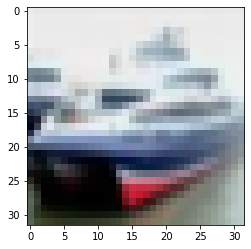

In [15]:
plt.imshow(test_images[1])

This prediction of a ship appears to be correct. 